## Simple example distribution normal/gaussiana

In [160]:

import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm
from scipy.integrate import quad

In [161]:
# some useful function
# necessário o uso de: from import scipy.stats import norm
# e
# from scipy.integrate import quad


# essa é somente uma função para obter Max(P(X = x)) de forma empírica,
# teóricamente, para a distribuição normal, Max(P(X = x)) = mi (seu primeiro parâmetro)
def norm_MaxPdf(mi, sigma, values):
    """Find the max value P(X = x), pdf (probabilistic density function), Normal distribuition,
    using params mi, sigma. Return the value x and P(X = x) 
    mi, sigma: Normal param
    values: Values x to calculate P(X = x)
    return: Value x and P(x = x) to max P(X = x)
    
    Example:
    xMax1, probMax1 = norm_MaxPdf(0,1, x = np.linspace(-25,25, 150))
    Output:
    xMax1, probMax1 = -0.16778523489932695 0.39336612865502313
    
    """
    maxi, ind = 0, 0
    for b in values:
        p = norm(mi, sigma).pdf(b)
        if(p > maxi):
            maxi = p
            ind = b
    return (ind, maxi)


def prob_interval_norm(mi, sigma, a,b):
    """Obtém a probabilidade, área, dentro de um intervalo [a,b] para a distribuição normal
    mi, sigma: int, float, parâmetros da distribuição normal
    [a,b]: int, intervalo para o cálculo da probabilidade total
    return: probabilidade total, área, no intervalo [a,b]
    
    Example:
    
    from scipy.integrate import quad

    def integrando(mi, sigma, x):
        return (1/np.sqrt(2*np.pi*sigma))*np.exp(-0.5*((x-mi)/sigma)**2)

    i = quad(integrando, a, b, args=(10,5))
    print(i[0])
    
    """
    def integrando(mu, sigmu, x):
        return (1/np.sqrt(2*np.pi*sigmu))*np.exp(-0.5*((x-mu)/sigmu)**2) #função normal padrão
    
    area = quad(integrando, a, b, args=(mi,sigma)) #integrando sobre o intervalo [a,b], ver referência [3]
    return area[0]


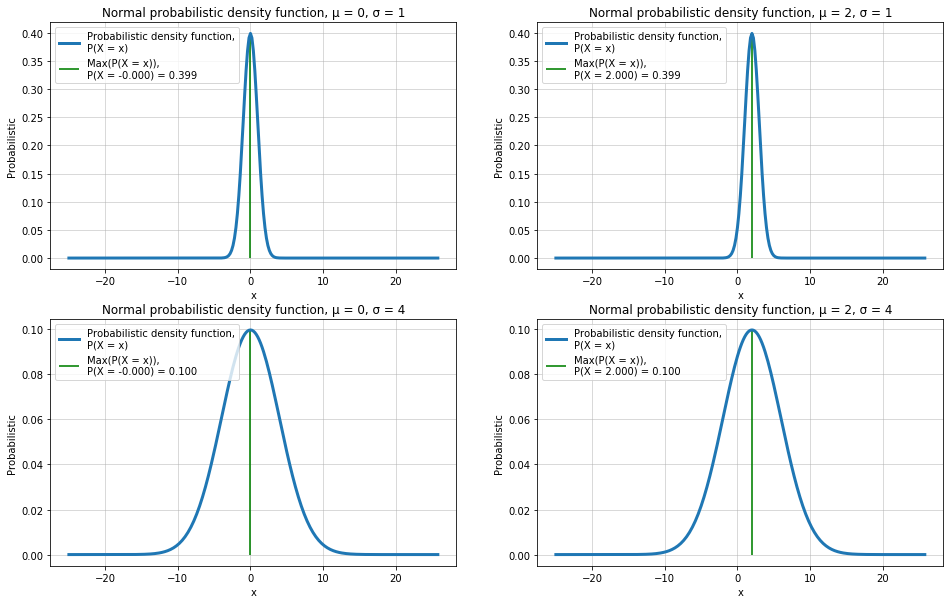

In [94]:

x = np.arange(-25,25+1, 0.2)
norm_pdf1 = norm(0,1).pdf(x) # probabilistic density function
norm_pdf2 = norm(2,1).pdf(x) 
norm_pdf3 = norm(0,4).pdf(x)
norm_pdf4 = norm(2,4).pdf(x)

# plot

fig, ([axe1, axe2],[axe3,axe4]) = plt.subplots(2,2, figsize=(16,10))

axe1.plot(x, norm_pdf1, lw=3, label='Probabilistic density function,\nP(X = x)')
axe1.set_title('Normal probabilistic density function, μ = {0}, σ = {1}'.format(0,1))
axe1.set_xlabel('x')
axe1.set_ylabel('Probabilistic')
axe1.grid(alpha=0.6)

xMax1, probMax1 = norm_MaxPdf(0,1, x)
axe1.vlines(xMax1,0, probMax1, lw=2, color='green', alpha=0.8, label='Max(P(X = x)),\nP(X = {0:.3f}) = {1:.3f}'.format(xMax1, probMax1))
axe1.legend(loc='upper left')

axe2.plot(x, norm_pdf2, lw=3, label='Probabilistic density function,\nP(X = x)')
axe2.set_title('Normal probabilistic density function, μ = {0}, σ = {1}'.format(2,1))
axe2.set_xlabel('x')
axe2.set_ylabel('Probabilistic')
axe2.grid(alpha=0.6)

xMax2, probMax2 = norm_MaxPdf(2,1, x)
axe2.vlines(xMax2,0, probMax2, lw=2, color='green', alpha=0.8, label='Max(P(X = x)),\nP(X = {0:.3f}) = {1:.3f}'.format(xMax2, probMax2))
axe2.legend(loc='upper left')

axe3.plot(x, norm_pdf3, lw=3, label='Probabilistic density function,\nP(X = x)')
axe3.set_title('Normal probabilistic density function, μ = {0}, σ = {1}'.format(0,4))
axe3.set_xlabel('x')
axe3.set_ylabel('Probabilistic')
axe3.grid(alpha=0.6)

xMax3, probMax3 = norm_MaxPdf(0,4, x)
axe3.vlines(xMax3,0, probMax3, lw=2, color='green', alpha=0.8, label='Max(P(X = x)),\nP(X = {0:.3f}) = {1:.3f}'.format(xMax3, probMax3))
axe3.legend(loc='upper left')

axe4.plot(x, norm_pdf4, lw=3, label='Probabilistic density function,\nP(X = x)')
axe4.set_title('Normal probabilistic density function, μ = {0}, σ = {1}'.format(2,4))
axe4.set_xlabel('x')
axe4.set_ylabel('Probabilistic')
axe4.grid(alpha=0.6)

xMax4, probMax4 = norm_MaxPdf(2,4, x)
axe4.vlines(xMax4,0, probMax4, lw=2, color='green', alpha=0.8, label='Max(P(X = x)),\nP(X = {0:.3f}) = {1:.3f}'.format(xMax4, probMax4))
axe4.legend(loc='upper left')

plt.show()


In [196]:

#interval [a,b]
a, b = 10 - 2*np.sqrt(5), 10 + 2*np.sqrt(5)
prob_interAB = prob_interval_norm(10,5, a,b)

print('P(a <= x <= b), μ = {0}, σ = {1}, = {2}'.format(10,5, prob_interAB))


P(a <= x <= b), μ = 10, σ = 5, = 0.9714076547434896


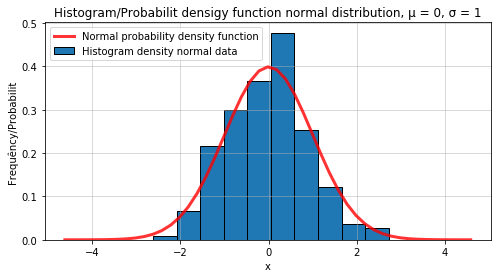

In [198]:

x_norm = norm(0,1).rvs(200, random_state=42)
x_rvs = np.arange(min(x_norm)-2, max(x_norm)+2, 0.2)

fig, axe = plt.subplots(figsize=(8,4))
axe.hist(x_rand_norm, density=True, edgecolor='black', label='Histogram density normal data')
axe.plot(x_rvs, norm(0,1).pdf(x_rvs), lw=3, color='red', alpha=0.8, label='Normal probability density function')
axe.set_title('Histogram/Probabilit densigy function normal distribution, μ = {0}, σ = {1}'.format(0,1))
axe.set_xlabel('x')
axe.set_ylabel('Frequêncy/Probabilit')
axe.grid(alpha=0.6)
axe.legend()

plt.show()

## Questions

- Divida a tela gráfica 2×2 e desenhe o gráfico das densidades de probabilidade de uma N(0,1) na posição (1,1) da janela, uma N(2,1) na posição (1,2), uma N(0,4) na posição (2,1) e uma N(2,4) na posição (2,2).

Essas 4 plotagens são realizadas logo acima.

- Qual o ponto x em que f(x) assume o valor máximo?  Este ponto depende de σ?  E a altura f(x) no ponto de máximo, ela depende de σ?

A plotagem acima apresenta em sua legenda o valor de x e f(x) para o qual f(x) assume o valor máximo, 
cada plotagem apresenta estes dados.<br> Observando as plotagens podemos concluir, de forma informal, que os
valores de x, para o qual f(x) é máximo, aparenta depender do parâmetro μ, teóricamente esse é o ponto x de máximo valor para f(x). A função f(x), por sua vez, parece depender, por algum fator ou função de σ.

- No caso da gaussiana, o parâmetro σ controla a variação em torno de μ.  Para uma N(10,5) verifique que a área debaixo da densidade entre 10−2×√5 e 10 + 2×√5  ́e aproximadamente igual  a  0.95.   Use  a  função pnorm para  isto.   Este   ́e  um  resultado  geral:   no  caso  de  uma gaussiana, a chance de observar um valor distante mais de 2σ de do valor esperado e central μ é aproximadamente 0.05.

Acima é definida e utilizada a função <b>prob_interval_norm</b> que utilizamos para a resolução desse problema. Podemos observar que:<br>
P(a <= x <= b), μ = 10, σ = 5, = 0.9714076547434896 ,<br>
para o intervalo colocado no problema.

- Gere  200  valores  aleatórios  independentes  de X ∼ N(μ,σ)  com μ e σ escolhidos  por  você. Faça um histograma forçando a  ́area total ser igual a 1 (argumento prob=T) e sobreponha a curva da densidade gaussiana que vocêe usou.  Eles se parecem?

Acima é plotado o gráfico contendo f(x), função de densidade de probabilidade da normal, e o histograma feito a partir
da distribuição normal, podemos observar que os dados se encaixam de forma parecida com a f(x).

## References

[1]https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm
<br>
[2]https://homepages.dcc.ufmg.br/~assuncao/EstatCC/LivroDeExerciciosFECD.pdf
<br>
[3]https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html
<br>